# **Advanced Lane Finding** 
***
As a part of the Udacity Self Driving Car Engineer Nanodegree program, we use computer vision to implement to again implement lane finding, but using a more advanced set of techniques than the first project of the course.

---

**Advanced Lane Finding Project**

The goals / steps of this project are the following:

1. [Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.](#camera_calibration)
2. [Apply a distortion correction to raw images.](#apply_distortion)
3. Use color transforms, gradients, etc., to create a thresholded binary image.
4. Apply a perspective transform to rectify binary image ("birds-eye view").
5. Detect lane pixels and fit to find the lane boundary.
6. Determine the curvature of the lane and vehicle position with respect to center.
7. Warp the detected lane boundaries back onto the original image.
8. Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

## Camera Calibration

<a id='camera_calibration'></a>

### 1. Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.

In [76]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline


def getpoints(imgfiles, nx, ny, drawcorners=False, allowoffbyone=True):
    '''Construct image points and object points from chessboard calibration image files'''
    imgpoints = []
    objpoints = []
    imgsize = None

    # prepare constant object points to append if corners found in an image
    objp = np.zeros((nx*ny,3), dtype=np.float32)
    objp[:,:2] = np.mgrid[:nx,:ny].T.reshape(-1,2)

    # Process images and build imgpoints list
    for imgfile in imgfiles:
        
        img = mpimg.imread(imgfile)
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        this_imgsize = gray.shape[::-1]
        if imgsize is None:
            imgsize = this_imgsize # store (width, height) for use by cv2.calibrateCamera()
        else:
            msg = 'Size mismatch: {}. {} != {}.'.format(imgfile, imgsize, gray.shape[::-1])
            # a couple of the images have an extra pixel in each dimension, but it should be
            # ok since the corners are within the smaller dimension range?
            # Thus, let's optionally allow it.
            allowedsizes = [this_imgsize]
            if allowoffbyone:
                allowedsizes.append((this_imgsize[0] - 1, this_imgsize[1] - 1))
            assert imgsize in allowedsizes, msg

        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

        # If corners found, draw corners, and append corresponding img/obj points
        if ret:
            
            # Optionally plot the images with corners drawn
            if drawcorners:
                cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
                plt.figure()
                plt.imshow(img)
                plt.title(imgfile + ' corners')
            
            objpoints.append(objp)
            imgpoints.append(corners)
            
    
    return objpoints, imgpoints, imgsize

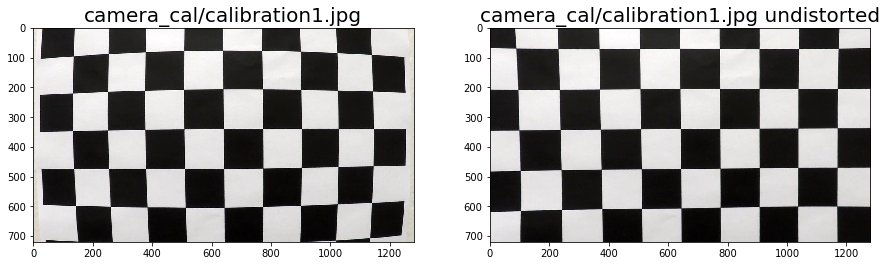

In [79]:
import glob
import os

# Make a list of calibration image files
imgfiles = glob.glob('camera_cal/calibration*.jpg')
imgfiles.sort()

# Get corresponding image files
objpoints, imgpoints, imgsize = getpoints(imgfiles, nx=9, ny=6)

# Compute calibration matrix and distortion coefficients
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, imgsize, None, None)

# Load a calibration image and undistort it
examplefile = imgfiles[0]
img = mpimg.imread(examplefile)
dst = cv2.undistort(img, mtx, dist, None, mtx)

# Plot the undistortion before and after
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,30))
ax1.imshow(img)
ax1.set_title(examplefile, fontsize=20)
ax2.imshow(dst)
ax2.set_title(examplefile + ' undistorted', fontsize=20)
name, ext = os.path.splitext(os.path.basename(examplefile))
fig.savefig('examples/' + name + '_undistortion' + ext, bbox_inches='tight')

assert ret, "Problem Calibrating Camera!"

## Pipeline (single images)